<AxesSubplot:>

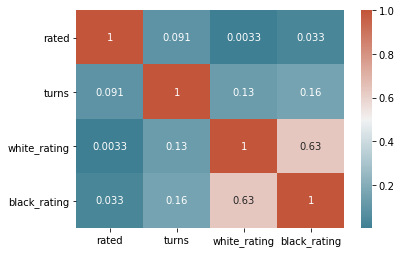

In [1]:
import pandas as pd
import seaborn as sns
from scripts import project_functions

df=project_functions.load_and_process('../../data/raw/games.csv');
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True) )

The correlation heatmap shows very limited relationships between our numeric variables, though the correlation between the two ratings may imply some sort of skill based matchmaking

,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_name,first_move_white,first_move_black,match_rating,average_rating
9787,False,35,resign,white,-l-_jedi_knight_-l-,2967,erik123678,1503,Scandinavian Defense: Mieses-Kotroc Variation,e4,d5,2967,2235.0
9035,False,122,resign,black,1111112222,3192,crusova_35,1895,Sicilian Defense: Bowdler Attack,e4,c5,3192,2543.5
6508,False,149,draw,draw,a55s72,3546,ak6664,1500,Rat Defense: Harmonist,e4,d6,3546,2523.0
703,False,60,resign,black,a7twen,2819,bloonfreakster,1478,Kadas Opening,h4,e5,2819,2148.5
6524,False,5,resign,white,a_arda_y,2699,mehmetali_t,1518,Ruy Lopez,e4,e5,2699,2108.5


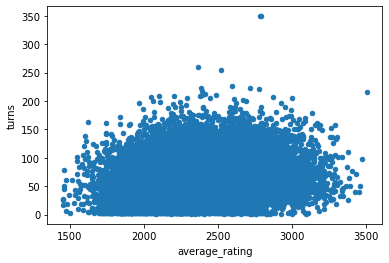

In [13]:
#trying to plot the average rating of a match versus the number of turns (wondering if the number of turns would increase with combined rating)

for ind, row in df.iterrows():
    df.loc[ind, "average_rating"]=(row['white_rating']+row['black_rating'])/2
df.plot(kind = 'scatter', x = 'average_rating', y = 'turns')
df.head()

I expected games to have more turns as the average rating increased, but it almost appears that the middle ratings have the most turns.

<AxesSubplot:xlabel='black_rating', ylabel='white_rating'>

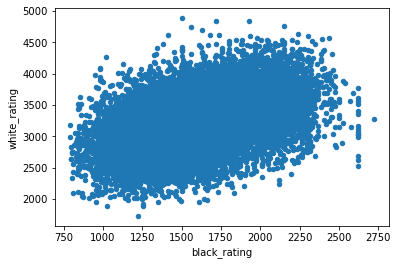

In [12]:
df.plot(kind = 'scatter', x = 'black_rating', y='white_rating')

This plot seems to show that black is *usually* the lower rated player. I wonder if this is by design?

<AxesSubplot:ylabel='Frequency'>

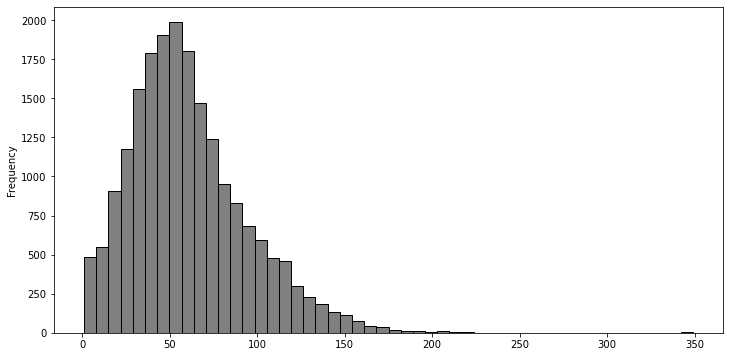

In [17]:
df['turns'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

This plot shows that most games last around 50 turns, almost following a normal distribution.